In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
import pandas as pd

In [4]:
train=pd.read_csv('train_values.csv')
train

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70,3,18,37,246,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178,3,369,52,299,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163,3,16,10,306,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155,1,305,47,180,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305,3,24,37,20,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1
5,5,1,1,3,1,133,3,221,13,55,...,51.0,6078.0,4.821,82745.0,96.550,1827.0,2340.0,964,False,1
6,6,3,1,1,1,240,3,374,28,131,...,104.0,6068.0,26.427,65282.0,81.068,1863.0,2560.0,5488,False,1
7,7,2,1,1,1,210,3,322,37,35,...,55.0,6030.0,78.153,108353.0,59.439,969.0,1601.0,2442,True,1
8,8,1,1,3,2,209,3,24,37,20,...,244.0,5151.0,88.156,63414.0,62.813,411.0,481.0,2118,True,1
9,9,1,1,3,1,197,3,194,9,20,...,86.0,7916.0,24.893,65927.0,100.000,1861.0,2123.0,3507,False,0


In [5]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,...,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,...,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344,0.500228
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,...,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175,0.500000
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,...,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000,0.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,...,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000,1.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,...,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000,1.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,...,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000,1.000000


In [6]:
train.tail()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
499995,499995,1,1,1,2,150,1,-1,-1,-1,...,87.0,NaN,NaN,NaN,NaN,NaN,NaN,969,True,0
499996,499996,1,1,1,1,140,3,74,47,98,...,216.0,3452.0,6.887,86307.0,100.000,1423.0,1944.0,5359,True,0
499997,499997,1,2,1,1,22,3,-1,46,131,...,35.0,2925.0,36.046,47826.0,100.000,1062.0,1762.0,2318,False,0
499998,499998,1,1,2,1,35,3,367,6,149,...,41.0,3442.0,98.879,60327.0,62.803,618.0,1297.0,5339,False,0
499999,499999,1,1,3,1,71,3,408,28,133,...,85.0,3856.0,12.095,45033.0,100.000,1525.0,2750.0,5710,True,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null int64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-

In [8]:
train_set,test_set=train_test_split(train,test_size=0.3,random_state=40)

In [9]:
train["loan_amount"][:5]

0     70
1    178
2    163
3    155
4    305
Name: loan_amount, dtype: int64

In [10]:
train["loan_cat"]=np.ceil(train["loan_amount"]/1.5)
train["loan_cat"].where(train["loan_cat"]<5,5.0,inplace=True)

In [11]:
train.tail()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted,loan_cat
499995,499995,1,1,1,2,150,1,-1,-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,969,True,0,5.0
499996,499996,1,1,1,1,140,3,74,47,98,...,3452.0,6.887,86307.0,100.000,1423.0,1944.0,5359,True,0,5.0
499997,499997,1,2,1,1,22,3,-1,46,131,...,2925.0,36.046,47826.0,100.000,1062.0,1762.0,2318,False,0,5.0
499998,499998,1,1,2,1,35,3,367,6,149,...,3442.0,98.879,60327.0,62.803,618.0,1297.0,5339,False,0,5.0
499999,499999,1,1,3,1,71,3,408,28,133,...,3856.0,12.095,45033.0,100.000,1525.0,2750.0,5710,True,0,5.0


In [12]:
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index,test_index in split.split(train, train["loan_cat"]):
    strat_train_set=train.loc[train_index]
    strat_test_set=train.loc[test_index]

In [13]:
strat_test_set["loan_cat"].value_counts()/len(strat_test_set)

5.0    0.97675
4.0    0.01081
2.0    0.00818
3.0    0.00296
1.0    0.00130
Name: loan_cat, dtype: float64

In [14]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("loan_cat",axis=1,inplace=True)

In [15]:
strat_train_set.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
162276,162276,1,1,1,1,212,2,314,48,45,...,155.0,4554.0,37.842,71304.0,100.000,1153.0,373.0,5726,False,0
62602,62602,2,1,1,1,224,2,376,20,11,...,85.0,5308.0,39.459,57838.0,97.462,1305.0,2387.0,3048,True,1
36050,36050,1,1,3,1,55,3,324,6,251,...,31.0,7792.0,80.015,62718.0,55.244,1113.0,1740.0,1909,False,1
48114,48114,1,1,1,1,181,3,305,47,68,...,60.0,3693.0,15.013,78841.0,100.000,1152.0,173.0,6240,False,1
100922,100922,1,1,3,1,403,3,24,37,20,...,89.0,4555.0,81.422,64675.0,100.000,1175.0,1363.0,5488,False,0


In [16]:
train=strat_test_set.copy()

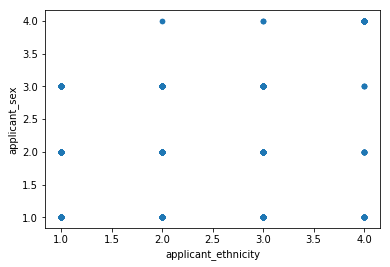

In [17]:
train.plot(kind="scatter",x="applicant_ethnicity",y="applicant_sex")

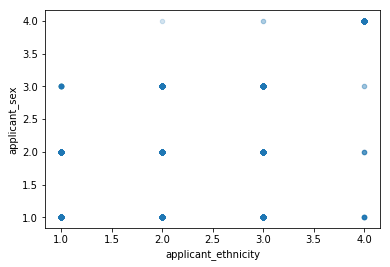

In [18]:
train.plot(kind="scatter",x="applicant_ethnicity",y="applicant_sex",alpha=0.1)

In [19]:
corr_matrix=train.corr()
corr_matrix["accepted"].sort_values(ascending=False)

accepted                          1.000000
co_applicant                      0.101776
tract_to_msa_md_income_pct        0.090678
state_code                        0.089311
msa_md                            0.079776
applicant_income                  0.078728
ffiecmedian_family_income         0.064641
county_code                       0.050096
loan_amount                       0.048290
applicant_race                    0.042070
number_of_owner-occupied_units    0.030394
occupancy                         0.027750
preapproval                       0.021552
loan_type                         0.015936
population                        0.013476
applicant_ethnicity               0.010395
lender                            0.008468
number_of_1_to_4_family_units     0.003946
row_id                            0.000695
applicant_sex                    -0.037007
property_type                    -0.078064
minority_population_pct          -0.090773
loan_purpose                     -0.130195
Name: accep

In [20]:
train=strat_train_set.drop("accepted",axis=1)
train_labels=strat_train_set["accepted"].copy()

In [21]:
train_labels.describe()

count    400000.000000
mean          0.499770
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

In [22]:
train_labels.head()

162276    0
62602     1
36050     1
48114     1
100922    0
Name: accepted, dtype: int64

In [23]:

train_labels_cat=pd.DataFrame(train_labels)
train_labels_cat["cat"]=np.ceil(train_labels_cat["accepted"]/100000)
train_labels_cat["cat"].where(train_labels_cat["cat"]<5,5.0,inplace=True)
#train_labels_cat.head()
train_labels_cat=train_labels_cat.drop("accepted",axis=1)

In [24]:
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
311289,311289,1,1,1,1,126,1,-1,-1,-1,...,1,144.0,NaN,NaN,NaN,NaN,NaN,NaN,6032,True
404969,404969,1,1,1,1,165,1,-1,-1,-1,...,1,87.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,True
265244,265244,2,1,3,1,172,3,374,28,131,...,1,NaN,7385.0,81.504,65073.0,97.384,1433.0,1884.0,3791,False
167313,167313,3,1,1,1,234,1,-1,-1,-1,...,1,87.0,NaN,NaN,NaN,NaN,NaN,NaN,4701,True
269381,269381,1,1,3,1,952,3,313,37,111,...,1,NaN,4322.0,35.351,119015.0,84.992,1014.0,1695.0,4988,False


In [25]:
#we drop co_applicant since is not numerical
train_num=train.drop("co_applicant",axis=1)
train_num.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,...,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
162276,162276,1,1,1,1,212,2,314,48,45,...,5,2,155.0,4554.0,37.842,71304.0,100.000,1153.0,373.0,5726
62602,62602,2,1,1,1,224,2,376,20,11,...,5,1,85.0,5308.0,39.459,57838.0,97.462,1305.0,2387.0,3048
36050,36050,1,1,3,1,55,3,324,6,251,...,5,2,31.0,7792.0,80.015,62718.0,55.244,1113.0,1740.0,1909
48114,48114,1,1,1,1,181,3,305,47,68,...,5,2,60.0,3693.0,15.013,78841.0,100.000,1152.0,173.0,6240
100922,100922,1,1,3,1,403,3,24,37,20,...,5,1,89.0,4555.0,81.422,64675.0,100.000,1175.0,1363.0,5488


In [26]:
#we fit in the missing numbers using imputer from scikit learn

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr[0]

array([-0.60890802, -0.52969946, -0.20615747, -1.12519736, -0.33590469,
       -0.01685634, -1.40792551,  0.95643038,  1.51952636, -0.99295093,
       -2.02894543,  0.20777605,  0.79279899,  0.36887161, -0.31611393,
        0.25680094,  0.14610283,  0.55755254, -0.37496692, -1.68760927,
        1.090833  ])

In [27]:
from sklearn.compose import ColumnTransformer

num_attribs = list(train_num)
cat_attribs = ["co_applicant"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train)
train_prepared[0]

array([-0.60890802, -0.52969946, -0.20615747, -1.12519736, -0.33590469,
       -0.01685634, -1.40792551,  0.95643038,  1.51952636, -0.99295093,
       -2.02894543,  0.20777605,  0.79279899,  0.36887161, -0.31611393,
        0.25680094,  0.14610283,  0.55755254, -0.37496692, -1.68760927,
        1.090833  ,  1.        ,  0.        ])

In [31]:
X_test=strat_test_set.drop("accepted",axis=1)
y_test=strat_test_set["accepted"].copy()

In [32]:
train_labels_cat_test=pd.DataFrame(y_test)
train_labels_cat_test["cat"]=np.ceil(train_labels_cat_test["accepted"]/100000)
train_labels_cat_test["cat"].where(train_labels_cat["cat"]<5,5.0,inplace=True)
train_labels_cat_test=train_labels_cat_test.drop("accepted",axis=1)

In [33]:
X_test_prepared=full_pipeline.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_cls = GaussianNB()
nb_cls.fit(train_prepared, train_labels_cat)

some_data=train[:5]
some_labels=train_labels_cat[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions:",nb_cls.predict(some_data_prepared))